<a href="https://colab.research.google.com/github/alxmarqs/LLMtopics/blob/main/comparativo_com_veriscolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPARAÇÃO: REGRESSÃO LOGÍSTICA vs SVM

📊 Dataset:
  - Total de amostras: 100 (sem Versicolor)
  - Amostras de treino: 80
  - Amostras de teste: 20
  - Classes: Setosa (0) vs Virginica (1)
  - Distribuição treino: Setosa=40, Virginica=40
  - Distribuição teste: Setosa=10, Virginica=10

MODELO 1: REGRESSÃO LOGÍSTICA

🚀 Iniciando treinamento da Regressão Logística...

Época 100/1000 | Loss Treino: 0.0390 | Loss Teste: 0.0355 | Acurácia Teste: 1.0000
Época 200/1000 | Loss Treino: 0.0193 | Loss Teste: 0.0169 | Acurácia Teste: 1.0000
Época 300/1000 | Loss Treino: 0.0129 | Loss Teste: 0.0110 | Acurácia Teste: 1.0000
Época 400/1000 | Loss Treino: 0.0097 | Loss Teste: 0.0081 | Acurácia Teste: 1.0000
Época 500/1000 | Loss Treino: 0.0078 | Loss Teste: 0.0064 | Acurácia Teste: 1.0000
Época 600/1000 | Loss Treino: 0.0065 | Loss Teste: 0.0053 | Acurácia Teste: 1.0000
Época 700/1000 | Loss Treino: 0.0056 | Loss Teste: 0.0045 | Acurácia Teste: 1.0000
Época 800/1000 | Loss Treino: 0.0049 | Loss Teste:

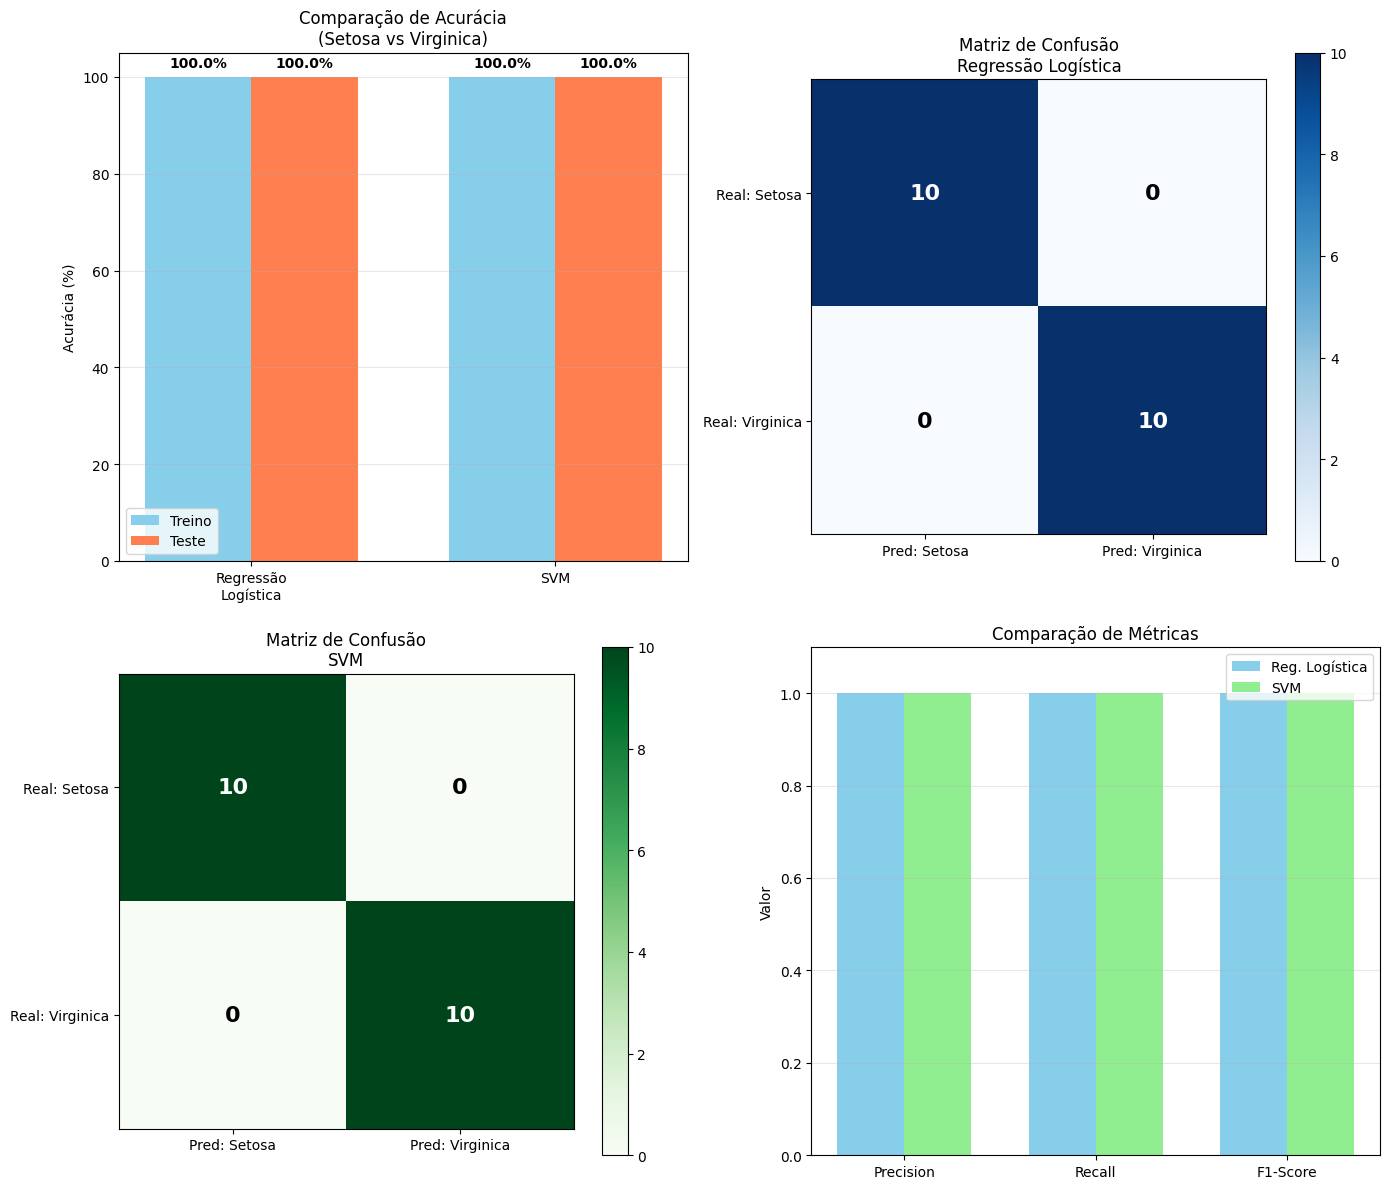


✅ Comparação concluída!


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("COMPARAÇÃO: REGRESSÃO LOGÍSTICA vs SVM")
print("="*80)

# ============================================================
# 1. PREPARAR DADOS (MESMO PARA AMBOS OS MODELOS)
# ============================================================

# Carregar dataset Iris completo
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Remover classe 1 (Versicolor) para ter problema binário
X = X[y != 1]
y = y[y != 1]

# Criar problema binário: Setosa (0) vs Virginica (2)
y_binary = (y == 2).astype(float)  # 1 se Virginica, 0 se Setosa

# Dividir em treino (80 amostras) e teste (20 amostras)
# IMPORTANTE: usar random_state=42 para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary,
    train_size=80,
    test_size=20,
    random_state=42,
    stratify=y_binary
)

print(f"\n📊 Dataset:")
print(f"  - Total de amostras: {len(X)} (sem Versicolor)")
print(f"  - Amostras de treino: {len(X_train)}")
print(f"  - Amostras de teste: {len(X_test)}")
print(f"  - Classes: Setosa (0) vs Virginica (1)")
print(f"  - Distribuição treino: Setosa={len(y_train[y_train==0])}, Virginica={len(y_train[y_train==1])}")
print(f"  - Distribuição teste: Setosa={len(y_test[y_test==0])}, Virginica={len(y_test[y_test==1])}")

# ============================================================
# 2. REGRESSÃO LOGÍSTICA
# ============================================================

print("\n" + "="*80)
print("MODELO 1: REGRESSÃO LOGÍSTICA")
print("="*80)

# Converter para tensores (formato para Regressão Logística: 0 e 1)
X_train_lr = torch.tensor(X_train, dtype=torch.float32)
y_train_lr = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_lr = torch.tensor(X_test, dtype=torch.float32)
y_test_lr = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definir modelo
modelo_lr = torch.nn.Linear(4, 1)

# Definir função de perda e otimizador
funcao_perda_lr = torch.nn.BCEWithLogitsLoss()
optimizer_lr = torch.optim.SGD(modelo_lr.parameters(), lr=0.1)

# Treinar
print("\n🚀 Iniciando treinamento da Regressão Logística...\n")
for epoch in range(1000):
    modelo_lr.train()
    optimizer_lr.zero_grad()
    outputs = modelo_lr(X_train_lr)
    loss = funcao_perda_lr(outputs, y_train_lr)
    loss.backward()
    optimizer_lr.step()

    if (epoch + 1) % 100 == 0:
        modelo_lr.eval()
        with torch.no_grad():
            test_outputs = modelo_lr(X_test_lr)
            test_loss = funcao_perda_lr(test_outputs, y_test_lr)
            probabilities = torch.sigmoid(test_outputs)
            predictions = probabilities > 0.5
            accuracy = (predictions == y_test_lr).float().mean()

        print(f"Época {epoch+1}/1000 | Loss Treino: {loss.item():.4f} | "
              f"Loss Teste: {test_loss.item():.4f} | Acurácia Teste: {accuracy.item():.4f}")

# Avaliação final - Regressão Logística
print("\n📊 Avaliação Final - Regressão Logística:")
modelo_lr.eval()
with torch.no_grad():
    # Treino
    train_outputs_lr = modelo_lr(X_train_lr)
    train_probs_lr = torch.sigmoid(train_outputs_lr)
    train_preds_lr = (train_probs_lr > 0.5).numpy().flatten()
    y_train_lr_np = y_train_lr.numpy().flatten()
    accuracy_train_lr = (train_preds_lr == y_train_lr_np).sum() / len(y_train_lr_np)

    # Teste
    test_outputs_lr = modelo_lr(X_test_lr)
    test_probs_lr = torch.sigmoid(test_outputs_lr)
    test_preds_lr = (test_probs_lr > 0.5).numpy().flatten()
    y_test_lr_np = y_test_lr.numpy().flatten()
    accuracy_test_lr = (test_preds_lr == y_test_lr_np).sum() / len(y_test_lr_np)

    # Matriz de confusão - Teste
    tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test_lr_np, test_preds_lr).ravel()

    # AUC-ROC
    auc_lr = roc_auc_score(y_test_lr_np, test_probs_lr.numpy().flatten())

print(f"\n✓ Acurácia Treino: {accuracy_train_lr:.4f} ({accuracy_train_lr*100:.2f}%)")
print(f"✓ Acurácia Teste:  {accuracy_test_lr:.4f} ({accuracy_test_lr*100:.2f}%)")
print(f"✓ AUC-ROC: {auc_lr:.4f}")

print(f"\n✓ Matriz de Confusão (Teste):")
print(f"                Predito Setosa    Predito Virginica")
print(f"Real Setosa           {tn_lr:3d}               {fp_lr:3d}")
print(f"Real Virginica        {fn_lr:3d}               {tp_lr:3d}")

# Métricas
precision_lr = tp_lr / (tp_lr + fp_lr) if (tp_lr + fp_lr) > 0 else 0
recall_lr = tp_lr / (tp_lr + fn_lr) if (tp_lr + fn_lr) > 0 else 0
f1_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr) if (precision_lr + recall_lr) > 0 else 0

print(f"\n✓ Métricas Detalhadas:")
print(f"  - Precision: {precision_lr:.4f}")
print(f"  - Recall: {recall_lr:.4f}")
print(f"  - F1-Score: {f1_lr:.4f}")

# ============================================================
# 3. SVM (SUPPORT VECTOR MACHINE)
# ============================================================

print("\n" + "="*80)
print("MODELO 2: SVM (SUPPORT VECTOR MACHINE)")
print("="*80)

# Converter para tensores (formato para SVM: -1 e +1)
X_train_svm = torch.tensor(X_train, dtype=torch.float32)
y_train_svm = torch.tensor(y_train, dtype=torch.float32)
y_train_svm[y_train_svm == 0] = -1  # Setosa → -1
# y_train_svm[y_train_svm == 1] permanece 1  # Virginica → +1

X_test_svm = torch.tensor(X_test, dtype=torch.float32)
y_test_svm = torch.tensor(y_test, dtype=torch.float32)
y_test_svm[y_test_svm == 0] = -1
# y_test_svm[y_test_svm == 1] permanece 1

# Definir parâmetros do SVM
n_features = X_train_svm.shape[1]
w = torch.randn(n_features, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Hiperparâmetros
learning_rate = 0.1
epochs = 1000
C = 1.0
optimizer_svm = torch.optim.SGD([w, b], lr=learning_rate)

# Treinar
print("\n🚀 Iniciando treinamento do SVM...\n")
for epoch in range(1000):
    optimizer_svm.zero_grad()

    # Predições no treino
    y_pred_train = X_train_svm @ w + b

    # Hinge loss
    perda_classificacao = torch.clamp(1 - y_train_svm.view(-1, 1) * y_pred_train, min=0).mean()

    # Regularização
    perda_regularizacao = 0.5 * torch.sum(w ** 2)

    # Loss total
    loss = perda_regularizacao + C * perda_classificacao

    loss.backward()
    optimizer_svm.step()

    if (epoch + 1) % 100 == 0:
        with torch.no_grad():
            # Avaliar no teste
            y_pred_test = X_test_svm @ w + b
            predictions_test = torch.sign(y_pred_test).squeeze()
            accuracy_test = (predictions_test == y_test_svm).float().mean()

        print(f"Época {epoch+1}/1000 | Loss Treino: {loss.item():.4f} | "
              f"Acurácia Teste: {accuracy_test.item():.4f}")

# Avaliação final - SVM
print("\n📊 Avaliação Final - SVM:")
with torch.no_grad():
    # Treino
    y_pred_train_svm = X_train_svm @ w + b
    train_preds_svm = torch.sign(y_pred_train_svm).squeeze().numpy()
    y_train_svm_np = y_train_svm.numpy()
    accuracy_train_svm = (train_preds_svm == y_train_svm_np).sum() / len(y_train_svm_np)

    # Teste
    y_pred_test_svm = X_test_svm @ w + b
    test_preds_svm = torch.sign(y_pred_test_svm).squeeze().numpy()
    y_test_svm_np = y_test_svm.numpy()
    accuracy_test_svm = (test_preds_svm == y_test_svm_np).sum() / len(y_test_svm_np)

    # Converter predições de {-1, +1} para {0, 1} para calcular matriz de confusão
    test_preds_svm_binary = (test_preds_svm == 1).astype(int)

    # Matriz de confusão - Teste
    tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, test_preds_svm_binary).ravel()

    # Margem
    margin = 2.0 / torch.norm(w).item()

print(f"\n✓ Acurácia Treino: {accuracy_train_svm:.4f} ({accuracy_train_svm*100:.2f}%)")
print(f"✓ Acurácia Teste:  {accuracy_test_svm:.4f} ({accuracy_test_svm*100:.2f}%)")
print(f"✓ Margem do SVM: {margin:.4f}")

print(f"\n✓ Matriz de Confusão (Teste):")
print(f"                Predito Setosa    Predito Virginica")
print(f"Real Setosa           {tn_svm:3d}               {fp_svm:3d}")
print(f"Real Virginica        {fn_svm:3d}               {tp_svm:3d}")

# Métricas
precision_svm = tp_svm / (tp_svm + fp_svm) if (tp_svm + fp_svm) > 0 else 0
recall_svm = tp_svm / (tp_svm + fn_svm) if (tp_svm + fn_svm) > 0 else 0
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm) if (precision_svm + recall_svm) > 0 else 0

print(f"\n✓ Métricas Detalhadas:")
print(f"  - Precision: {precision_svm:.4f}")
print(f"  - Recall: {recall_svm:.4f}")
print(f"  - F1-Score: {f1_svm:.4f}")

# ============================================================
# 4. COMPARAÇÃO FINAL
# ============================================================

print("\n" + "="*80)
print("📊 COMPARAÇÃO FINAL: REGRESSÃO LOGÍSTICA vs SVM")
print("="*80)

# Criar tabela comparativa
print(f"\n{'Métrica':<25} | {'Regressão Logística':<20} | {'SVM':<20}")
print(f"{'-'*25} | {'-'*20} | {'-'*20}")
print(f"{'Acurácia Treino':<25} | {accuracy_train_lr*100:>18.2f}% | {accuracy_train_svm*100:>18.2f}%")
print(f"{'Acurácia Teste':<25} | {accuracy_test_lr*100:>18.2f}% | {accuracy_test_svm*100:>18.2f}%")
print(f"{'Precision':<25} | {precision_lr:>20.4f} | {precision_svm:>20.4f}")
print(f"{'Recall':<25} | {recall_lr:>20.4f} | {recall_svm:>20.4f}")
print(f"{'F1-Score':<25} | {f1_lr:>20.4f} | {f1_svm:>20.4f}")
print(f"{'AUC-ROC':<25} | {auc_lr:>20.4f} | {'N/A':>20}")
print(f"{'VP (True Positives)':<25} | {tp_lr:>20d} | {tp_svm:>20d}")
print(f"{'VN (True Negatives)':<25} | {tn_lr:>20d} | {tn_svm:>20d}")
print(f"{'FP (False Positives)':<25} | {fp_lr:>20d} | {fp_svm:>20d}")
print(f"{'FN (False Negatives)':<25} | {fn_lr:>20d} | {fn_svm:>20d}")

# Determinar o vencedor
print(f"\n{'='*80}")
print("🏆 RESULTADO:")
print(f"{'='*80}")

if accuracy_test_lr > accuracy_test_svm:
    diferenca = (accuracy_test_lr - accuracy_test_svm) * 100
    print(f"✅ REGRESSÃO LOGÍSTICA teve melhor desempenho!")
    print(f"   Diferença: +{diferenca:.2f}% de acurácia no teste")
elif accuracy_test_svm > accuracy_test_lr:
    diferenca = (accuracy_test_svm - accuracy_test_lr) * 100
    print(f"✅ SVM teve melhor desempenho!")
    print(f"   Diferença: +{diferenca:.2f}% de acurácia no teste")
else:
    print(f"🤝 EMPATE! Ambos os modelos tiveram desempenho idêntico!")

print(f"{'='*80}")

# ============================================================
# 5. VISUALIZAÇÕES
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Comparação de Acurácia
models = ['Regressão\nLogística', 'SVM']
train_accs = [accuracy_train_lr * 100, accuracy_train_svm * 100]
test_accs = [accuracy_test_lr * 100, accuracy_test_svm * 100]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Treino', color='skyblue')
axes[0, 0].bar(x + width/2, test_accs, width, label='Teste', color='coral')
axes[0, 0].set_ylabel('Acurácia (%)')
axes[0, 0].set_title('Comparação de Acurácia\n(Setosa vs Virginica)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].set_ylim([0, 105])
axes[0, 0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(train_accs):
    axes[0, 0].text(i - width/2, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
for i, v in enumerate(test_accs):
    axes[0, 0].text(i + width/2, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 2: Matriz de Confusão - Regressão Logística
cm_lr = np.array([[tn_lr, fp_lr], [fn_lr, tp_lr]])
im1 = axes[0, 1].imshow(cm_lr, cmap='Blues')
for i in range(2):
    for j in range(2):
        axes[0, 1].text(j, i, cm_lr[i, j], ha="center", va="center",
                       color="white" if cm_lr[i, j] > cm_lr.max()/2 else "black",
                       fontsize=16, fontweight='bold')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_yticks([0, 1])
axes[0, 1].set_xticklabels(['Pred: Setosa', 'Pred: Virginica'])
axes[0, 1].set_yticklabels(['Real: Setosa', 'Real: Virginica'])
axes[0, 1].set_title('Matriz de Confusão\nRegressão Logística')
plt.colorbar(im1, ax=axes[0, 1])

# Gráfico 3: Matriz de Confusão - SVM
cm_svm = np.array([[tn_svm, fp_svm], [fn_svm, tp_svm]])
im2 = axes[1, 0].imshow(cm_svm, cmap='Greens')
for i in range(2):
    for j in range(2):
        axes[1, 0].text(j, i, cm_svm[i, j], ha="center", va="center",
                       color="white" if cm_svm[i, j] > cm_svm.max()/2 else "black",
                       fontsize=16, fontweight='bold')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_yticks([0, 1])
axes[1, 0].set_xticklabels(['Pred: Setosa', 'Pred: Virginica'])
axes[1, 0].set_yticklabels(['Real: Setosa', 'Real: Virginica'])
axes[1, 0].set_title('Matriz de Confusão\nSVM')
plt.colorbar(im2, ax=axes[1, 0])

# Gráfico 4: Comparação de Métricas
metrics = ['Precision', 'Recall', 'F1-Score']
lr_metrics = [precision_lr, recall_lr, f1_lr]
svm_metrics = [precision_svm, recall_svm, f1_svm]

x = np.arange(len(metrics))
axes[1, 1].bar(x - width/2, lr_metrics, width, label='Reg. Logística', color='skyblue')
axes[1, 1].bar(x + width/2, svm_metrics, width, label='SVM', color='lightgreen')
axes[1, 1].set_ylabel('Valor')
axes[1, 1].set_title('Comparação de Métricas')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1.1])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Comparação concluída!")
